# Libraries

In [110]:
from IPython.display import display
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)
# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [111]:
from scipy.stats import rankdata
from matplotlib import pyplot as plt
import statsmodels.api as sm
import numpy as np  
import pandas as pd  
import random
import plotly.express as px
from scipy.stats import uniform 
from matplotlib.pyplot import figure
import scipy.stats as stats
import math
import statistics
import pylab
from matplotlib.lines import Line2D

# Functions & Setup:

In [112]:
def bh_procedure(pval,alpha):
  df = pd.DataFrame()
  #Sort Pvalues:
  pval = pval.sort_values()
  n = len(pval)
  df['Pval'] = pval.values

  #Benjamini-Hochberg:
  df['Rank'] = rankdata(pval)
  df['K_val_BH'] = df['Rank']*0.05/n
  df['Reject_BH'] = (df['Pval'] <= df['K_val_BH']).astype(int)
  max_index = df[((df['Reject_BH']== 1) ==  True)].index.max()
  df['Reject_BH'][0:max_index] = 1
  
  #Bonferroni:
  df['Bonf_Val'] = 0.05/n
  df['Reject_Bonf'] = (df['Pval'] <= df['Bonf_Val']).astype(int)
  
  #Sidak:
  df['Sidak_Val'] = 1-(1-alpha)**(1/n)
  df['Reject_Sidak'] = (df['Pval'] <= df['Sidak_Val']).astype(int)

  #Simes:
  #Pvalues are already sorted and ranked.
  df['Simes_Val'] = min(df['Pval'] * n / df['Rank'])
  df['Reject_Simes'] = (df['Simes_Val'] <= alpha ).astype(int)
  exists = (1 in df['Reject_Simes'] )
  if exists:
    df['Reject_Simes'] = 1
  else:
    df['Reject_Simes'] = 0

  return df


Getting random p-values for demonstration:

In [113]:
P_val = abs(np.random.uniform(0, 0.3, 6).round(4))
P_val = np.append(P_val,[0.0003,0.0039,0.0007,0.0083])
P_val = pd.DataFrame(P_val,columns = ['P-Values'])
#Data Shown in the final project:
P_val['P-Values'] =[0.0003, 0.0007, 0.0039, 0.0083, 0.0437, 0.1707, 0.1782, 0.2035,0.2358, 0.2966]

In [115]:

sim0 = bh_procedure(df['P-Values'],0.05)
print("BH rejects:",sim0['Reject_BH'].sum())
print("Bonferroni rejects:",sim0['Reject_Bonf'].sum())
print("Sidak rejects:",sim0['Reject_Sidak'].sum())
print("Simes rejects:",sim0['Reject_Simes'].sum())
sim0


BH rejects: 4
Bonferroni rejects: 3
Sidak rejects: 3
Simes rejects: 10


,Pval,Rank,K_val_BH,Reject_BH,Bonf_Val,Reject_Bonf,Sidak_Val,Reject_Sidak,Simes_Val,Reject_Simes
0,0.0003,1.0,0.005,1,0.005,1,0.005116,1,0.003,1
1,0.0007,2.0,0.010,1,0.005,1,0.005116,1,0.003,1
2,0.0039,3.0,0.015,1,0.005,1,0.005116,1,0.003,1
3,0.0083,4.0,0.020,1,0.005,0,0.005116,0,0.003,1
4,0.0437,5.0,0.025,0,0.005,0,0.005116,0,0.003,1
5,0.1707,6.0,0.030,0,0.005,0,0.005116,0,0.003,1
6,0.1782,7.0,0.035,0,0.005,0,0.005116,0,0.003,1
7,0.2035,8.0,0.040,0,0.005,0,0.005116,0,0.003,1
8,0.2358,9.0,0.045,0,0.005,0,0.005116,0,0.003,1
9,0.2966,10.0,0.050,0,0.005,0,0.005116,0,0.003,1


Creating the Data for the simulations:

In [116]:
#Creating the NS distribution:
mu = 0
var = 1
sigma = math.sqrt(var)
x = np.random.normal(mu, sigma, 4000)
#Creating the Df:
x_df = (pd.DataFrame(x))
x_df.columns = ['z_i']
#P-Values for NS:
p_val = 2*(1-stats.norm.cdf(abs(x),loc = 0,scale = 1))
x_df["P_val"] = p_val
x_df


,z_i,P_val
0,1.405496,0.159874
1,0.048668,0.961184
2,0.329966,0.741425
3,0.504064,0.614217
4,0.754969,0.450268
...,...,...
3995,0.153866,0.877716
3996,-0.491614,0.622992
3997,0.013884,0.988922
3998,0.236413,0.813112


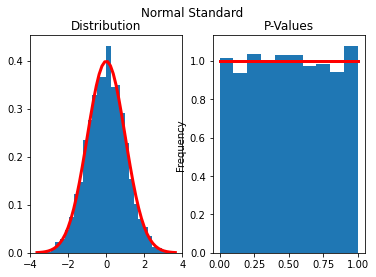

In [117]:
#Normal Distribution Plot:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Normal Standard')
count, bins, ignored = ax1.hist(x_df["z_i"], 30, density=True)
domain = np.linspace(np.min(x_df["z_i"]),np.max(x_df["z_i"]))
ax1.plot(domain,stats.norm.pdf(domain,mu,sigma), linewidth=3, color = 'r'),
# P-Values Distribution Plot:
count, bins, ignored = ax2.hist(x_df["P_val"], 10, density=True)
ax2.plot(bins, np.ones_like(bins), linewidth=3, color='r' )
ax2.set_ylabel('Frequency')
ax2.set_title('P-Values')
ax1.set_title('Distribution')
plt.show()


In [118]:
mu1 , mu2 = 3,5
var1, var2 = 1,1
sigma1, sigma2= math.sqrt(var),math.sqrt(var)
y1 = np.random.normal(mu1, sigma1, 2000)
y2 = np.random.normal(mu2, sigma2, 2000)
y = pd.DataFrame({'y1': y1, 'y2': y2}, columns=['y1', 'y2'])

#P-Values:
p_val_y1 = 2*(1-stats.norm.cdf(abs(y1),loc = mu,scale = 1))
p_val_y2 = 2*(1-stats.norm.cdf(abs(y2),loc = mu,scale = 1))
y['P_val_y1'] = p_val_y1
y['P_val_y2'] = p_val_y2

#Merged vectors:
pval_merged = pd.concat([y['P_val_y1'],y['P_val_y2']])
y1y2_merged = pd.concat([y['y1'],y['y2']])


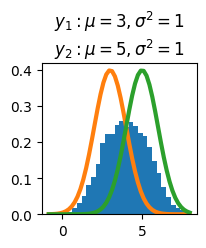

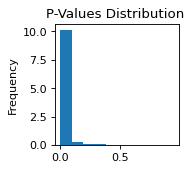

In [119]:
#Normal Distribution Plot:
figure(figsize=(2,2), dpi=100)
count, bins, ignored = plt.hist(y1y2_merged, 30, density=True)
domain = np.linspace(np.min(y1y2_merged),np.max(y1y2_merged))
plt.plot(domain,stats.norm.pdf(domain,mu1,sigma), linewidth=3),
plt.plot(domain,stats.norm.pdf(domain,mu2,sigma), linewidth=3),
plt.title('$y_{1} : \mu = 3 , \sigma^2 = 1$\n''$y_{2} : \mu = 5 , \sigma^2 = 1$' )
plt.show()
#P-Values Distribution Plot:
fig, ax = plt.subplots(figsize=(2,2), dpi=80)
count, bins, ignored = plt.hist(pval_merged, 10, density=True)
# ax.plot(bins, np.ones_like(bins), linewidth=3)
plt.title('P-Values Distribution ')
ax.set_ylabel('Frequency')
plt.show() 

# Final Graph

<function matplotlib.pyplot.show>

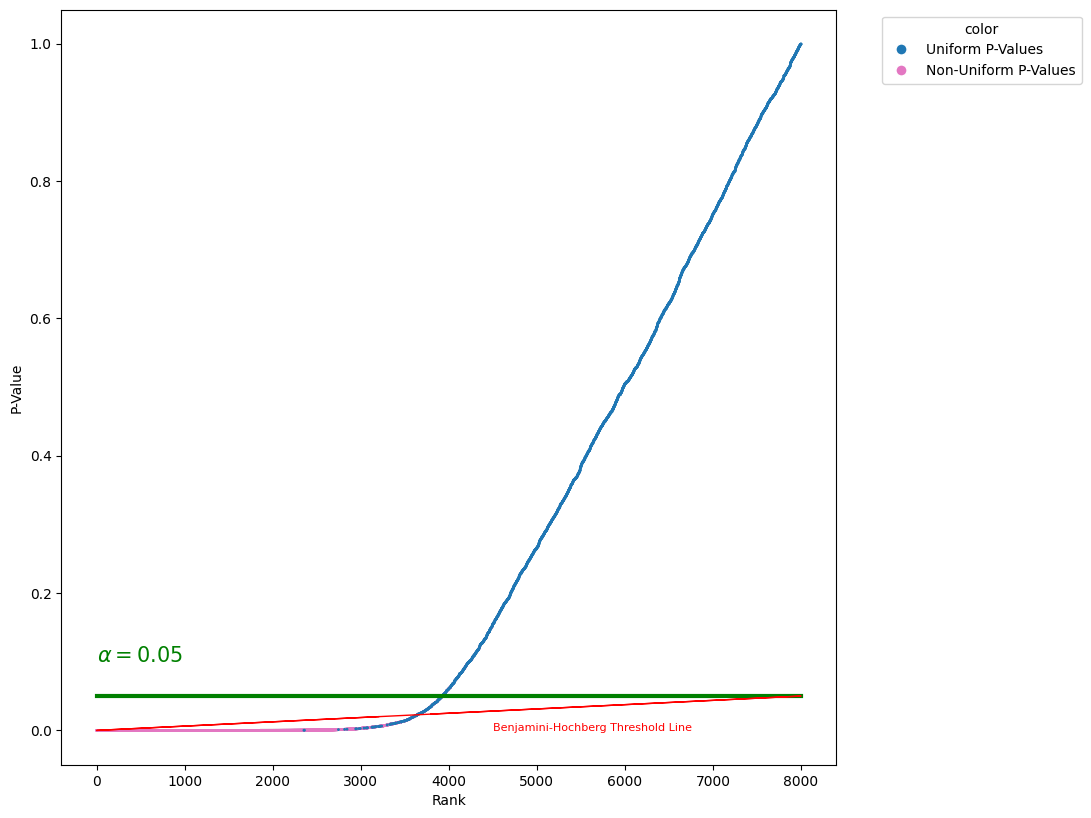

In [120]:
#Graph
allpvals = pd.DataFrame(pd.concat([pval_merged,x_df["P_val"]]))
allpvals['Rank'] = rankdata(allpvals)
allpvals['Significant'] = (0.05*allpvals['Rank']/8000 >= allpvals[0] ).astype(int)
allpvals ['Origin'] = (['Non-Uniform P-Values']*4000 +['Uniform P-Values']*4000)
colors = {'Uniform P-Values':'tab:blue', 'Non-Uniform P-Values':'tab:pink'}
fig, ax = plt.subplots(figsize=(10,10), dpi=100)
ax.plot([0,8000],[0.05,0.05],color='green',linewidth=3)
ax.scatter(x= allpvals['Rank'], y= allpvals[0], c =allpvals['Origin'].map(colors), s=1)
plt.text(0,0.1,r'$\alpha = 0.05 $', fontsize = 15,color='green')
plt.plot(allpvals['Rank'], 0.05*allpvals['Rank']/8000,color='r',linewidth=1)
plt.text(4500,0,"Benjamini-Hochberg Threshold Line", fontsize = 8,color='r')
# add a legend
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
ax.legend(title='color', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel('Rank')
ax.set_ylabel('P-Value')
plt.show


In [121]:
# Comparing amount of Rejections BH vs Bonferroni:
sim = bh_procedure(pval_merged,0.05)
print("BH rejects:",sim['Reject_BH'].sum())
print("Bonferroni rejects:",sim['Reject_Bonf'].sum())
print("Sidak rejects:",sim['Reject_Sidak'].sum())
print("Simes rejects:",sim['Reject_Simes'].sum())
sim

BH rejects: 3697
Bonferroni rejects: 1626
Sidak rejects: 1637
Simes rejects: 4000


,Pval,Rank,K_val_BH,Reject_BH,Bonf_Val,Reject_Bonf,Sidak_Val,Reject_Sidak,Simes_Val,Reject_Simes
0,1.332268e-15,1.0,0.000013,1,0.000013,1,0.000013,1,5.329071e-12,1
1,4.440892e-15,2.0,0.000025,1,0.000013,1,0.000013,1,5.329071e-12,1
2,9.103829e-15,3.0,0.000038,1,0.000013,1,0.000013,1,5.329071e-12,1
3,1.376677e-14,4.0,0.000050,1,0.000013,1,0.000013,1,5.329071e-12,1
4,1.598721e-14,5.0,0.000063,1,0.000013,1,0.000013,1,5.329071e-12,1
...,...,...,...,...,...,...,...,...,...,...
3995,8.460395e-01,3996.0,0.049950,0,0.000013,0,0.000013,0,5.329071e-12,1
3996,8.891507e-01,3997.0,0.049963,0,0.000013,0,0.000013,0,5.329071e-12,1
3997,9.012383e-01,3998.0,0.049975,0,0.000013,0,0.000013,0,5.329071e-12,1
3998,9.215036e-01,3999.0,0.049988,0,0.000013,0,0.000013,0,5.329071e-12,1
